## 차원축소
- 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성  
- 필요성   
    - 차원이 증가할수록 데이터 포인트 간의 거리가 멀어져 희소한 구조를 가지게되어 예측 신뢰도가 떨어집니다.
    - 피처가 많을 경우 개별 피처간에 상관관계가 높은 가능성이 크며, 선형 회귀 같은 선형 모델에서는 입력 변수 간의 상관관계가 높을 경우 이로 인한 다중 공선성으로 예측 성능이 저하됩니다.
    - 이렇게 매우 많은 다차원의 피처를 차원 축소해 피처 수를 줄이면 더 직관적으로 데이터를 해석할 수 있기 때문에 차원축소는 중요합니다.

- 차원축소
    - 피처 선택(feature selection) : 특정 피처에 종속성이 강한 불필요한 피처는 제거하고, 데이터 특징을 잘 나타내는 주요 피처만 선택
    - 피처 추출(feature extraction) : 기존 피처를 저차원의 중요 피처로 압축해서 추출하는 것으로, 새롭게 추출된 중요 특성은 기존의 피처가 압축된 것이므로 기존의 피처와는 완전히 다른 값

- 차원축소 알고리즘
    - PCA : 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법
    - SVD : 
    - NMF :

### PCA
- PCA는 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소하는데, 이것이 PCA의 주성분  
  ( 분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주 )
- PCA, 즉 주성분 분석은 원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 설명하는 분석기법
- 단계
    - 1. 입력 데이터 세트의 공분한 행렬을 생성
    - 2. 공분산 행렬의 고유벡터와 고유값을 계산
    - 3. 고유값이 가장 큰 순으로 K개( PCA 변환 차수만큼 )만큼 고유벡터를 추출
    - 4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = load_iris()
columns = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df = pd.DataFrame(iris.data, columns=columns)
iris_df['target'] = iris.target
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### sepal_length, sepal_width 두개의 속성으로 데이터 산포 시각화

Text(0, 0.5, 'sepal_width')

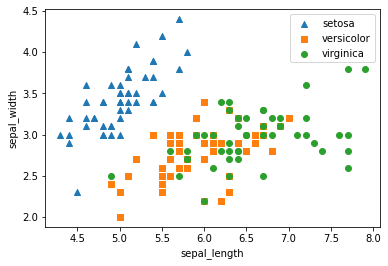

In [3]:
markers = ['^','s','o']


for i, markers in enumerate(markers):
    x_axis = iris_df[iris_df['target']==i]['sepal_length']
    y_axis = iris_df[iris_df['target']==i]['sepal_width']
    plt.scatter(x_axis,y_axis,marker=markers,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')


In [4]:
iris_df.iloc[:,:-1]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### 평균이 0, 분산이 1인 정규 분포로 원본 데이터를 변환

In [5]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(iris_df.iloc[:,:-1])
iris_scaled.shape

(150, 4)

#### PCA 변환

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
iris_pca.shape

(150, 2)

In [7]:
columns= ['pca_component_1','pca_component_2']
iris_df_pca = pd.DataFrame(iris_pca, columns=columns)
iris_df_pca['target'] = iris.target
iris_df_pca.head()

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


#### PCA로 차원 축소된 피처들로 데이터 산포도 시각화

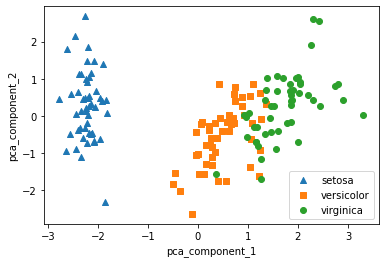

In [8]:
markers = ['^','s','o']


for i,markers in enumerate(markers):
    x_axis = iris_df_pca[iris_df_pca['target']==i]['pca_component_1']
    y_axis = iris_df_pca[iris_df_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis,y_axis,marker=markers,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

#### 각 PCA Component별 변동성 비율

In [9]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


#### 원본 데이터와 PCA 변환된 데이터 기반에서 예측 성능 비교

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(random_state=156)
score = cross_val_score(rcf,iris.data,iris.target,scoring='accuracy',cv=3)
print(score)

[0.98039216 0.92156863 0.97916667]


In [11]:
pca_x = iris_df_pca[['pca_component_1','pca_component_2']]
score_pca = cross_val_score(rcf,pca_x,iris.target,scoring='accuracy',cv=3)
print(score_pca)

[0.8627451  0.84313725 0.89583333]


#### 신용카드 데이터 세트 PCA 변환

In [12]:
df = pd.read_csv('credit_card.csv')
df = df.drop(['ID'],axis=1)
print(df.shape)
df.head()

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [13]:
df.rename(columns={'PAY_0':'PAY_1','default.payment.next.month':'target'},inplace=True)
y_target = df['target']
x_features = df.drop(['target'],axis=1)

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

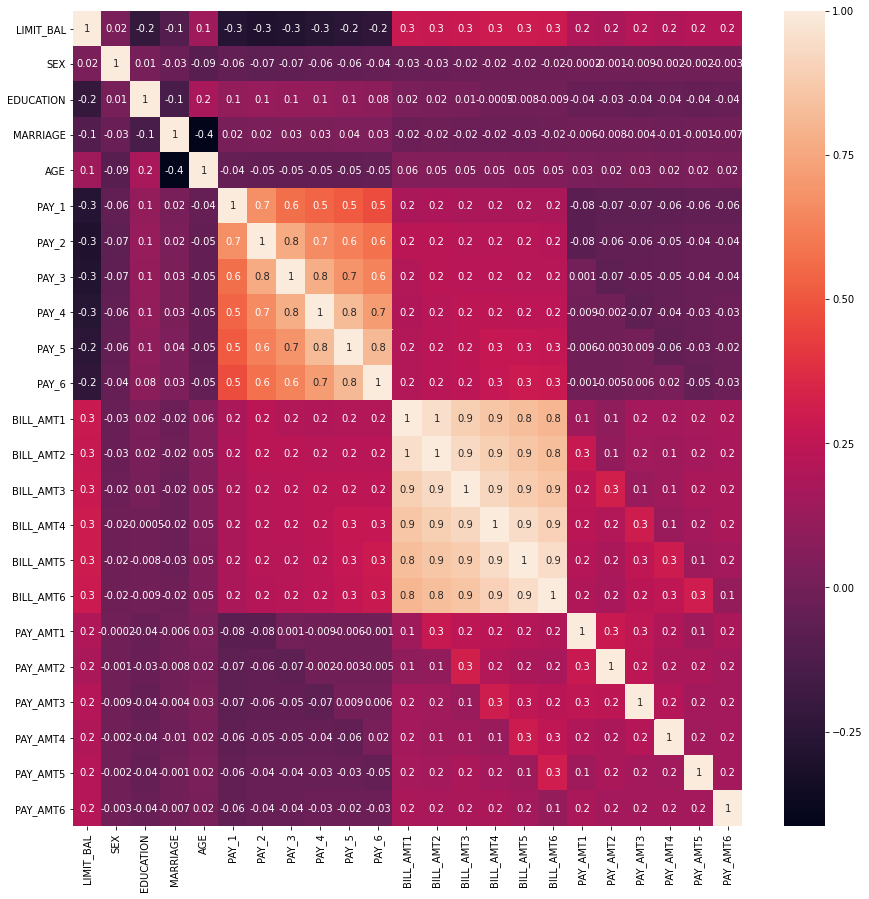

In [15]:
corr = x_features.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,fmt='.1g')

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:', cols_bill)

scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(x_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성 :',pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성 : [0.90555253 0.0509867 ]


In [17]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, x_features,y_target,scoring='accuracy',cv=3)

print('CV=3인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3인 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(x_features)

pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf,df_pca,y_target,scoring='accuracy',cv=3)

print("CV=3인 경우의 PCA 변환된 개별 fold별 정확도 : ",scores_pca)
print('PCA 변환 데이터 세트 평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3인 경우의 PCA 변환된 개별 fold별 정확도 :  [0.7918 0.7968 0.8016]
PCA 변환 데이터 세트 평균 정확도:0.8170


### LDA

- 선형 판별 분석법으로 불리며,PCA와 매우 유사
- PCA는 입력 데이터의 변동성의 가장 큰 축을 찾아 차원 축소하는 방식이지만, LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾아 차원 축소하는 방식
- 즉 LDA는 클래스 간 분산은 최대한 크게 가져가고, 클래스 내부의 분산은 최대한 작게 가져가는 방식

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled,iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
lda_columns=['lda_component_1','lda_component_2']
iris_df_lda = pd.DataFrame(iris_lda,columns=lda_columns)
iris_df_lda['target'] = iris.target

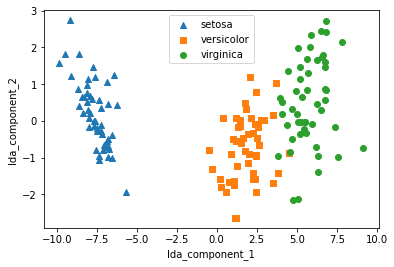

In [22]:
markers=['^','s','o']

for i, marker in enumerate(markers):
    x_axis = iris_df_lda[iris_df_lda['target'] == i]['lda_component_1']
    y_axis = iris_df_lda[iris_df_lda['target'] == i]['lda_component_2']
    
    plt.scatter(x_axis,y_axis,marker=marker,label=iris.target_names[i])
    
plt.legend()
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

### SVD

- PCA는 정방행렬( 행과 열의 크기가 같은 행렬 )만 고유벡터로 분해할 수 있지만, SVD는 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용 가능

In [23]:
import numpy as np
from numpy.linalg import svd

np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


#### SVD 행렬 분해

In [24]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U,3))
print('Sigma Value:\n',np.round(Sigma,3))
print('V transpose matrix:\n',np.round(Vt,3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


#### 분해된 행렬 복구

In [25]:
np.diag(Sigma)

array([[3.4229581 , 0.        , 0.        , 0.        ],
       [0.        , 2.02287339, 0.        , 0.        ],
       [0.        , 0.        , 0.46263157, 0.        ],
       [0.        , 0.        , 0.        , 0.07935069]])

In [26]:
Sigma_mat = np.diag(Sigma)
a = np.dot(np.dot(U, Sigma_mat),Vt)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


#### 데이터간 의존성이 높은 데이터 행렬 생성

In [27]:
a[2] = a[0]+a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [28]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U,3))
print('Sigma Value:\n',np.round(Sigma,3))
print('V transpose matrix:\n',np.round(Vt,3))

(4, 4) (4,) (4, 4)
U matrix:
 [[ 0.246  0.583  0.75   0.195]
 [-0.774 -0.017  0.105  0.624]
 [-0.529  0.566 -0.105 -0.624]
 [ 0.246  0.583 -0.645  0.429]]
Sigma Value:
 [2.663 0.807 0.    0.   ]
V transpose matrix:
 [[ 0.164 -0.575 -0.782 -0.173]
 [-0.68   0.194 -0.132 -0.695]
 [ 0.706  0.198  0.15  -0.664]
 [-0.113 -0.77   0.59  -0.216]]


In [33]:
U_ = U[:,:2]
Sigma_ = np.diag(Sigma[:2])
Vt_ = Vt[:2]

print(U_.shape, Sigma_.shape, Vt_.shape)

a_ = np.dot(np.dot(U_,Sigma_),Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


#### Truncated SVD

In [35]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

In [42]:
np.random.seed(121)
matrix = np.random.random((6,6))
print('원본행렬 : \n',matrix)

U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:',U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

원본행렬 : 
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]


In [46]:
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k = num_components)
print('\nTruncated SVD 분해 행렬 차원:', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)),Vt_tr)

print('\nTruncated SVD로 분해 후 복원 행렬:\n',matrix_tr)


Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 0.6740867  0.73812389]
 [0.59726589 0.47953891 0.56613544 0.80746028 0.13135039 0.03479656]]


#### 사이킷런 TruncatedSVD 클래스를 이용한 변환

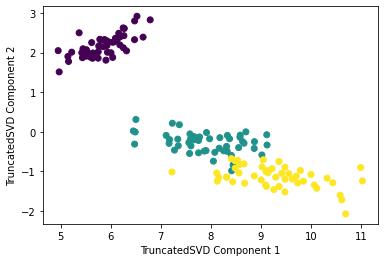

In [54]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

plt.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1],c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')
plt.show()

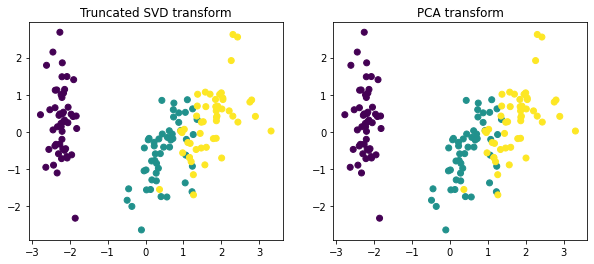

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

fig,( ax1, ax2 ) = plt.subplots(figsize=(10,4),ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y = iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:,0], y = iris_pca[:,1], c = iris.target)
ax1.set_title('Truncated SVD transform')
ax2.set_title('PCA transform')
plt.show()

### NMF

In [59]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

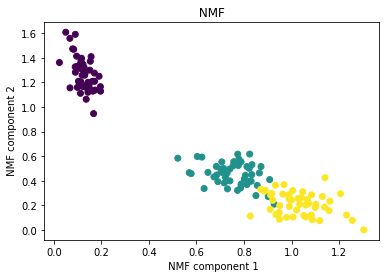

In [66]:
iris = load_iris()
iris_ftrs = iris.data

nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)

plt.scatter(x=iris_nmf[:,0],y = iris_nmf[:,1],c = iris.target)
plt.title(' NMF ')
plt.xlabel(' NMF component 1')
plt.ylabel(' NMF component 2')
plt.show()